# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les bulletins d'une année donnée

In [3]:
# Choisir une année
year = 1874

In [4]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f and "RptAn" in f]
txts

['Lkn_1874_Tome_RptAn_Part_8.txt']

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"— 406 —\ndevaient être déposées, et nous leur avons demandé si une heure\nleur suffisait pour modifier leur soumission, à quoi ils ont tous\nrépondu qu'ils avaient leurs apaisements. Nous leur offrions ,"

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"— 406 —\ndevaient être déposées, et nous leur avons demandé si une heure\nleur suffisait pour modifier leur soumission, à quoi ils ont tous\nrépondu qu'ils avaient leurs apaisements. Nous leur offrions , dans\nle cas contraire, de remettre l'adjudication au lendemain.\nInterpellés par moi sur le poinldesavoir s'ils connaissaient bien leurs\nobligations, les entrepreneurs m'ont tous répondu affirmativement.\nJe ne pense pas, Messieurs, qu'il soit possible de procéder plus\ncomplètement que cela.\nM . VAN "

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1874_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'devaient déposées demandé heure suffisait modifier soumission quoi répondu leurs apaisements offrions cas contraire remettre adjudication lendemain interpellés poinldesavoir connaissaient leurs obligations entrepreneurs répondu affirmativement pense messieurs possible procéder complètement den kerckhove ceux ordonné travail devaient éclairer intéressés échevin bockstael comprends den kerckhove cherche occasions possibles opposition rôle den kerckhove proteste allégation échevin bockstael explica'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('compte', 149), ('collège', 124), ('travaux', 123), ('conseil', 108), ('rue', 97), ('bockstael', 94), ('budget', 93), ('dépenses', 92), ('communal', 89), ('kerckhove', 78)]


### Créer, stocker et afficher le nuage de mots

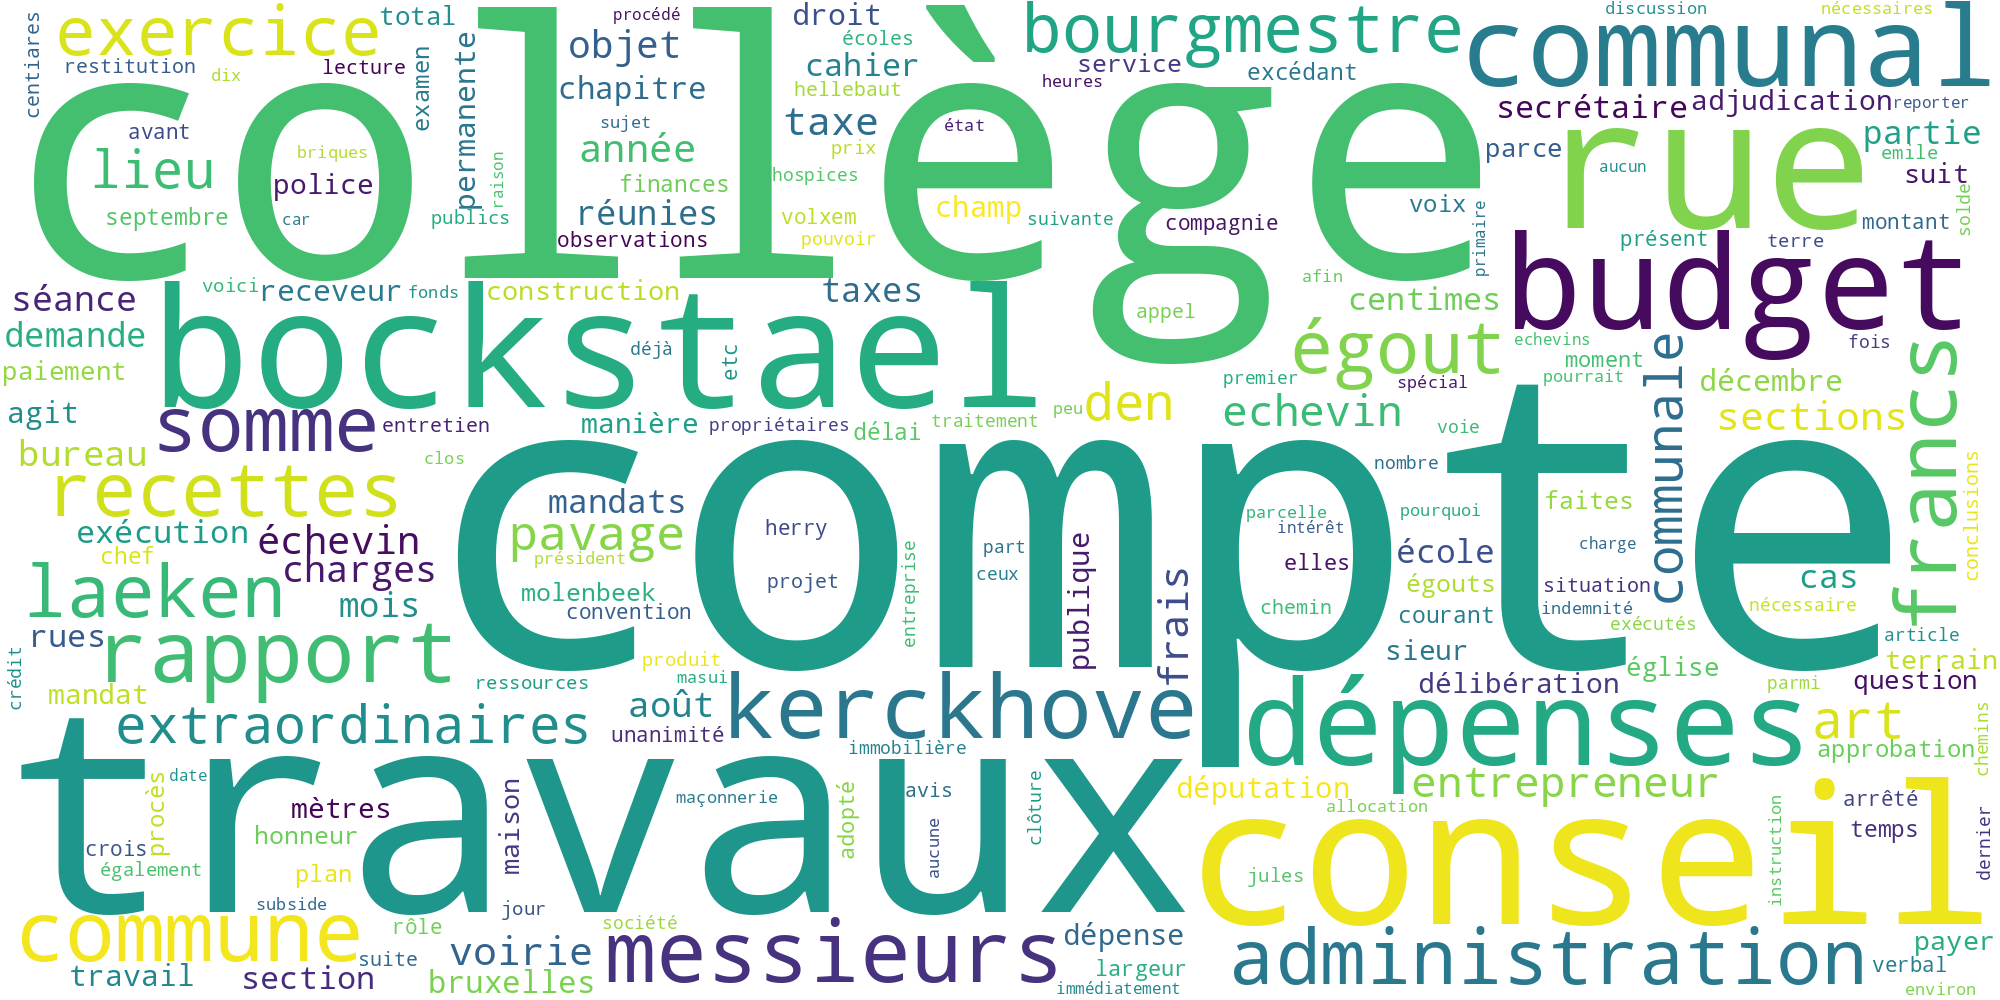

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))